In [12]:
import numpy as np
import IPython
import librosa


from scipy import signal as sp
from scipy.io import wavfile
from math import pi
from scipy.fftpack import fft
from scipy.fftpack import fftshift
from scipy.interpolate import interp1d as itp
import math
import cmath as cm

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from matplotlib import patches
import sounddevice as sd
from scipy.io.wavfile import write
#from plot_zplane import zplane

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

def plot_signal(x, xaxis_label=None,yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return

def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k


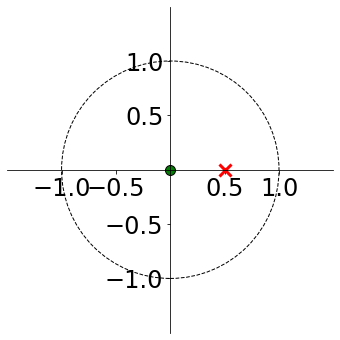

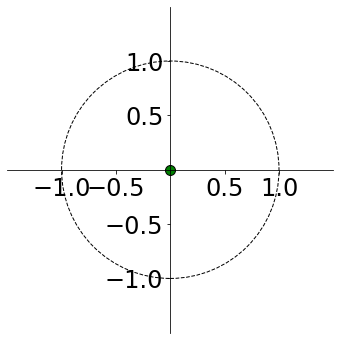

(array([0.]), array([2.5]), 1.0)

In [179]:
#Problem 1

#Part-1

#By observing the given difference equation we get the z-domain trnsformas follows
Ro=.5
Num=[1,0]
Den= [1,-Ro]
zplane(Num,Den)
Ro=2.5
Num=[1,0]
Den= [1,-Ro]
zplane(Num,Den)

[2.50000000e+00 6.25000000e+00 1.56250000e+01 3.90625000e+01
 9.76562500e+01 2.44140625e+02 6.10351562e+02 1.52587891e+03
 3.81469727e+03 9.53674316e+03 2.38418579e+04 5.96046448e+04
 1.49011612e+05 3.72529030e+05 9.31322575e+05 2.32830644e+06
 5.82076609e+06 1.45519152e+07 3.63797881e+07 9.09494702e+07]


Text(0.5, 1.0, 'Daily infections plot for 20 days')

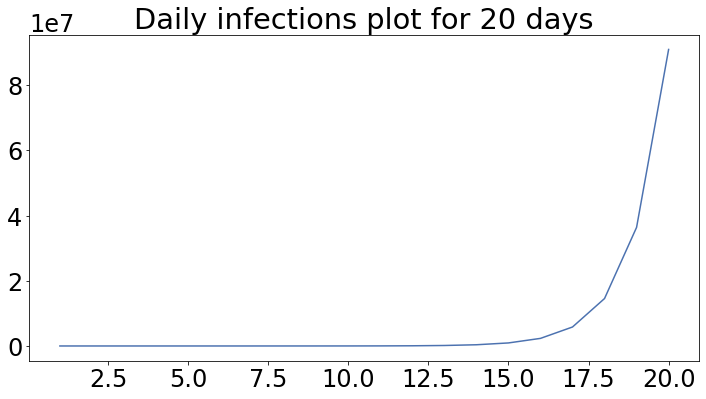

In [155]:
#Taking z-inverse  of the above difference equation

#Part-2 & Part-3

Ro=2.5
a=np.arange(1,21)
y = np.power(Ro,a)

print(y)
#From y-values it is seen that on 15th day daily infections are close to 1 million while it crosses the 1 million mark on 16th day.
plt.plot(a,y);plt.title("Daily infections plot for 20 days")


In [66]:
#Using the data it is noted that during first wave between April-17th to September-17th with 153days daily new covid infections
#using the assumption given in question were 1 million.

#Part-4

y=100000
n=153
Ro=np.power(10,np.log10(y)/n)
print(Ro)

1.078151368692323


In [166]:
#Transfer function of Digial Integrator

#Part-5

b=[0,1]
a=[1,-1]
u=sp.unit_impulse(21)
I1=sp.lfilter(Num,Den,u)
#print(I1)
I= sp.lfilter(b,a,I1)
print("Total infections(20 days)=",I[20]) #Prints total number of infections after 20 days 
#plt.plot(I)

Total infections(20 days)= 60632979.45152855


[1.00000000e+00 1.00000000e-01 1.60000000e-01 2.81000000e-01
 3.37100000e-01 4.81860000e-01 6.64601000e-01 6.42474100e-01
 7.59788560e-01 9.06417821e-01 1.06068925e+00 1.30184254e+00
 1.56704574e+00 1.74817638e+00 2.08203532e+00 2.47012843e+00
 2.91519946e+00 3.45596099e+00 4.07452401e+00 4.78110727e+00
 5.64394912e+00 6.65945955e+00 7.85572528e+00 9.27224573e+00
 1.09320267e+01 1.28835752e+01 1.51986985e+01 1.79266325e+01
 2.11430462e+01 2.49375108e+01 2.94084780e+01 3.46810857e+01
 4.09035078e+01 4.82411441e+01 5.68948833e+01 6.71009338e+01
 7.91360657e+01 9.33303828e+01 1.10072245e+02 1.29816667e+02
 1.53102699e+02 1.80565568e+02 2.12954079e+02 2.51152585e+02
 2.96203376e+02 3.49334954e+02 4.11996996e+02 4.85898967e+02
 5.73056955e+02 6.75849079e+02 7.97079673e+02 9.40055925e+02
 1.10867854e+03 1.30754782e+03 1.54208926e+03 1.81870165e+03
 2.14493145e+03 2.52967870e+03 2.98344002e+03 3.51859480e+03
 4.14974301e+03 4.89410350e+03 5.77198373e+03 6.80733377e+03
 8.02839981e+03 9.468494

Text(0.5, 1.0, 'Daily infections for 100 days')

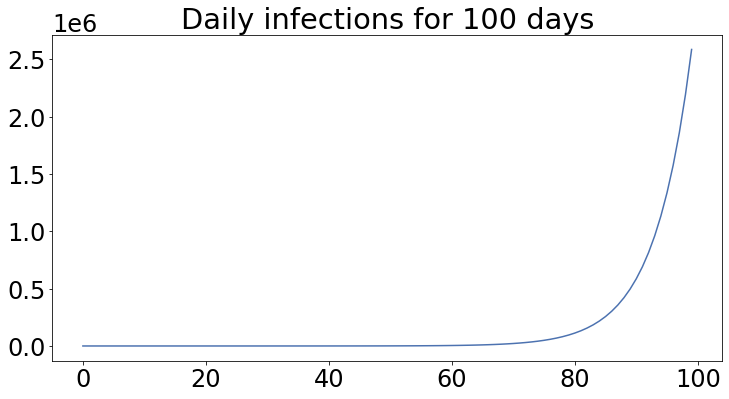

In [180]:
#Problem-2

#Part-1 & Part-2

n=[1,0,0,0,0,0,0,0,0,0,0,0,0]
d=[1,-.1, -.15, -.25, -.26, -.34, -.42, -.25, -.2, -.15, -.1, -.1, -.1]
u=sp.unit_impulse(100)
#f=y*u
b1=[0,1]
a1=[1,-1]
I1= sp.lfilter(n,d,u)
#I1=I1*y
print(I1) 
#From above vaues it would be 96th day to reach 1 million daily infections
I2=sp.lfilter(b1,a1,I1)
#print(I2)
Total = I2[99]
print("Total infections(100 days)=",Total) #Total infections for 100 days.
#18 Days it will take to reach 1 million
plt.plot(I1);plt.title("Daily infections for 100 days")

In [185]:
#Problem - 3


#n=[1,0,0,0,0,0,0,0,0,0,0,0,0]
#f=1-r
#d=[1,-.1, -.15, -.25, -.26, -.34, -.42, -.25, -.2, -.15, -.1, -.1, -.1]
def covid_filter(r):
    n=[1,0,0,0,0,0,0,0,0,0,0,0,0]
    d=[1,-.1, -.15, -.25, -.26, -.34, -.42, -.25, -.2, -.15, -.1, -.1, -.1]
    f=1-r
    for i in range(1,13):
        d[i]=f*d[i]
    print(d)
    u=sp.unit_impulse(101)
    #f=y*u
    I1= sp.lfilter(n,d,u)
    #I1=I1*y
    I2=sp.lfilter(b,a,I1)
    print(I1)
    plt.plot(I1,label=r);plt.title("Daily infections for 100 days");plt.legend()
    print("Total infections(100 days)=",I2[100]) #Gives Total number of infections for 100 days

#covid_filter(0.25)

[1, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Total infections(100 days)= 1.0


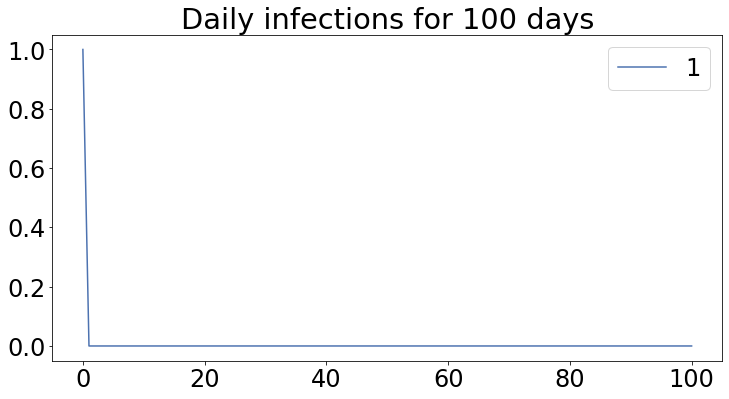

In [186]:
#PArt-1

covid_filter(1)

[1, -0.07500000000000001, -0.11249999999999999, -0.1875, -0.195, -0.255, -0.315, -0.1875, -0.15000000000000002, -0.11249999999999999, -0.07500000000000001, -0.07500000000000001, -0.07500000000000001]
[1.00000000e+00 7.50000000e-02 1.18125000e-01 2.04796875e-01
 2.37711328e-01 3.32641436e-01 4.47249421e-01 3.96719008e-01
 4.42288542e-01 4.97552717e-01 5.47930664e-01 6.45393911e-01
 7.42182050e-01 7.56122461e-01 8.55201215e-01 9.61554976e-01
 1.07258430e+00 1.20434148e+00 1.34029062e+00 1.47873031e+00
 1.64853031e+00 1.83662670e+00 2.04559491e+00 2.28096396e+00
 2.53768995e+00 2.82038907e+00 3.14171239e+00 3.49826888e+00
 3.89478895e+00 4.33658084e+00 4.82674503e+00 5.37224824e+00
 5.98110944e+00 6.65859344e+00 7.41276249e+00 8.25232245e+00
 9.18637741e+00 1.02263177e+01 1.13845126e+01 1.26736862e+01
 1.41088139e+01 1.57064115e+01 1.74847628e+01 1.94645670e+01
 2.16686730e+01 2.41223033e+01 2.68537583e+01 2.98944814e+01
 3.32794764e+01 3.70478040e+01 4.12428618e+01 4.59129176e+01
 5.1111

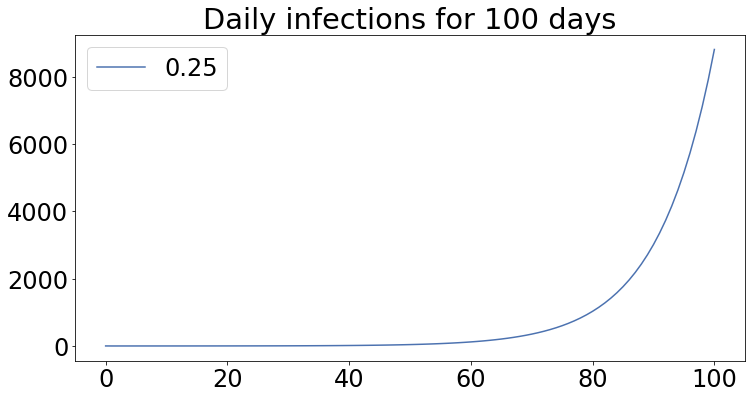

In [187]:
covid_filter(0.25)

[1, -0.05, -0.075, -0.125, -0.13, -0.17, -0.21, -0.125, -0.1, -0.075, -0.05, -0.05, -0.05]
[1.         0.05       0.0775     0.132625   0.14869375 0.20356906
 0.26648361 0.21309483 0.22048858 0.22959766 0.2332068  0.262357
 0.28679664 0.25307376 0.26910298 0.28335355 0.2945103  0.30916953
 0.31953765 0.32444219 0.33595701 0.34754933 0.35950344 0.37290372
 0.38478151 0.39579569 0.40967626 0.42360044 0.43782456 0.45259398
 0.46739025 0.48262049 0.4987917  0.51542893 0.53261504 0.55036651
 0.56857284 0.5874073  0.60698447 0.62717488 0.64802919 0.66956932
 0.69179964 0.7147834  0.73855304 0.76310434 0.78847006 0.8146751
 0.84174548 0.86972117 0.89863136 0.92849954 0.95935988 0.99124492
 1.02418893 1.0582295  1.09340225 1.12974328 1.16729199 1.20608839
 1.24617418 1.28759274 1.33038803 1.37460547 1.42029249 1.46749793
 1.51627233 1.56666794 1.61873852 1.67253969 1.72812901 1.78556591
 1.84491183 1.90623022 1.96958661 2.03504874 2.10268659 2.17257248
 2.24478115 2.31938978 2.39647813 2.47612

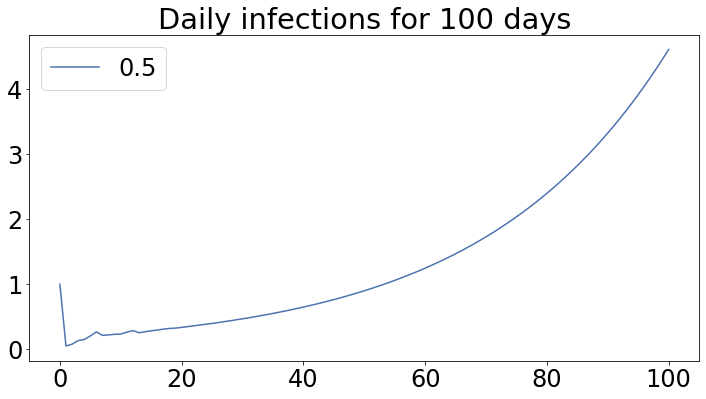

In [188]:
covid_filter(0.5)

[1, -0.025, -0.0375, -0.0625, -0.065, -0.085, -0.105, -0.0625, -0.05, -0.0375, -0.025, -0.025, -0.025]
[1.00000000e+00 2.50000000e-02 3.81250000e-02 6.43906250e-02
 6.96019531e-02 9.31625098e-02 1.18566675e-01 8.33588987e-02
 7.79158347e-02 7.23498290e-02 6.47425370e-02 6.91043218e-02
 7.15723820e-02 4.63719059e-02 4.56362436e-02 4.41075672e-02
 4.16132242e-02 3.98633557e-02 3.70021715e-02 3.28328285e-02
 3.03891505e-02 2.80728743e-02 2.59693443e-02 2.42600383e-02
 2.23018872e-02 2.02148366e-02 1.88039687e-02 1.74221205e-02
 1.61098482e-02 1.48970324e-02 1.37207010e-02 1.26249464e-02
 1.16627089e-02 1.07693809e-02 9.94569172e-03 9.18502230e-03
 8.47044920e-03 7.81230257e-03 7.21559643e-03 6.66136752e-03
 6.14883847e-03 5.67520557e-03 5.23666288e-03 4.83268907e-03
 4.46109504e-03 4.11776199e-03 3.80078750e-03 3.50804192e-03
 3.23759231e-03 2.98818537e-03 2.75818438e-03 2.54577879e-03
 2.34970611e-03 2.16871000e-03 2.00163708e-03 1.84747474e-03
 1.70520798e-03 1.57388105e-03 1.45266329e-

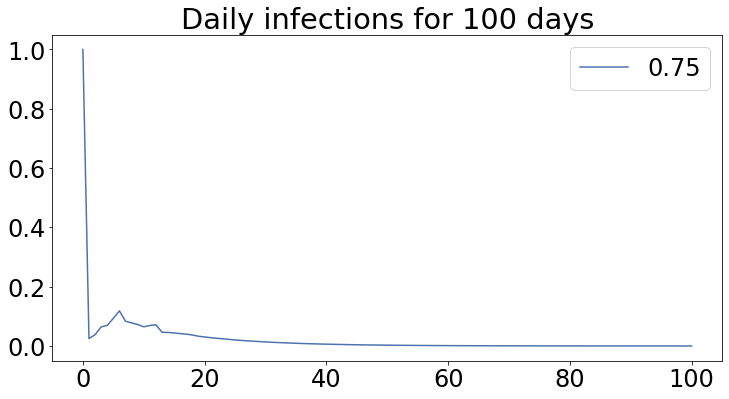

In [189]:
covid_filter(0.75)

900024.711611943
(array([84], dtype=int64), {'peak_heights': array([34917.75133541])})


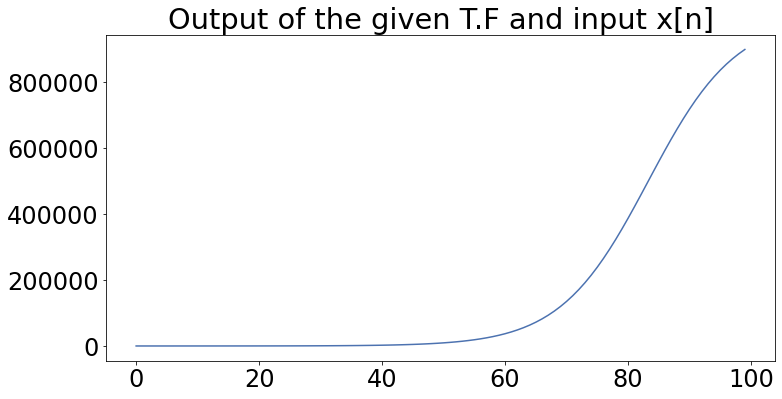

In [215]:
#Problem-4 

#The Transfer function for saturation consideration
N=np.zeros(100)
N[0]=1
D=np.ones(100)
K=1000000
R=1.15
n=np.arange(1,101)

#Logistic function
P=np.power(R,(n+1))
x1= K*P/(P+K*(R-1)-R) 
x1=x1-(1/(R-1))
#plt.plot(x1);plt.title("Evolution of total number of cases")
print(x1[99])

w=sp.lfilter(N,D,x1)
plt.plot(x1);plt.title("Output of the given T.F and input x[n]")

Xpeaks = sp.find_peaks(w,height=10000)
print(Xpeaks)

#The output obtained for the given input.

(array([84], dtype=int64), {'peak_heights': array([34917.75133541])})


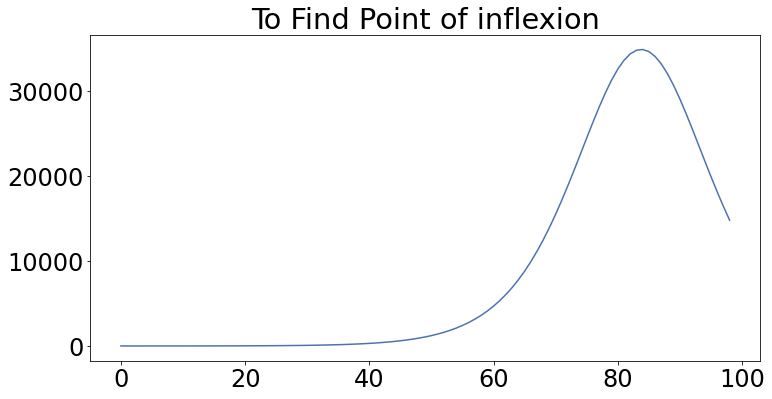

In [196]:
#First derivative

Nn1=[1,-1]
Nd1=[1,0]

w1=sp.lfilter(Nn1,Nd1,x1)
#print(w1)
#plt.plot(w)
plt.plot(w1);plt.title("To Find Point of inflexion")

Xpeaks = sp.find_peaks(w1,height=10000)
print(Xpeaks)

Text(0.5, 1.0, 'To find point of inflexion')

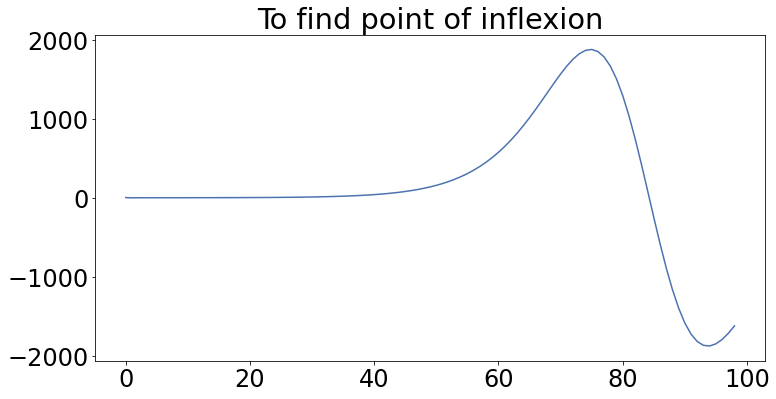

In [197]:
#Second Derivative

Nn2=[1,-2,1]
Nd2=[1,0,0]

w2=sp.lfilter(Nn2,Nd2,x1)
plt.plot(w2);plt.title("To find point of inflexion")


Text(0, 0.5, 'Total infections of first order model')

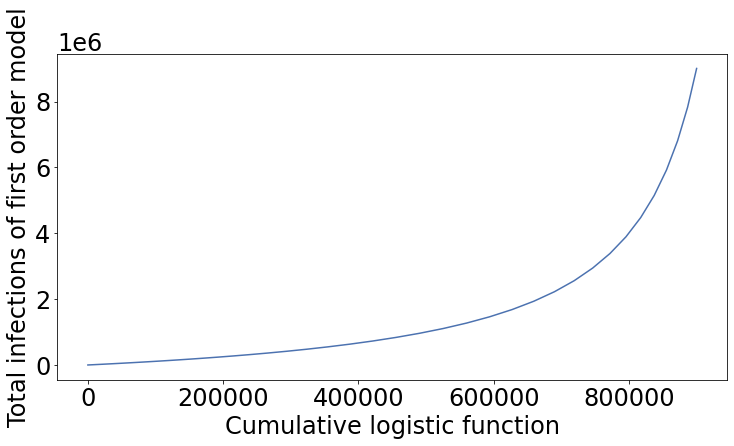

In [208]:
n=np.arange(1,101)
a=np.power(1.15,n)
b=[1,0]
a1=[1,-1]
F=sp.lfilter(b,a1,a)
plt.plot(x1,F);plt.xlabel("Cumulative logistic function");plt.ylabel("Total infections of first order model")